In [11]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float , img_as_ubyte
from skimage.util import random_noise
import numpy as np
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)
import skimage
import skimage.filters

from load_image import load_image, parse
import numpy as np

In [34]:
# genearate 0 matrix of SIZE
SIZE = 256;
Init_Matrix = np.zeros((SIZE, SIZE))
# random rectangles in matrix
NUMBER_OF_RECTANGLES = 30;
MAX_Rectangle_Size = 10;
for i in range(NUMBER_OF_RECTANGLES):
    x = np.random.randint(0, SIZE)
    y = np.random.randint(0, SIZE)
    w = MAX_Rectangle_Size
    h = MAX_Rectangle_Size
    Init_Matrix[x:x+w, y:y+h] = 1



with open('./noised/1KP8-Ap1-pj_90.mrc', 'rb') as f:
    data = f.read()

array, header, extended_header = parse(data)
Init_Matrix = array/array.max()

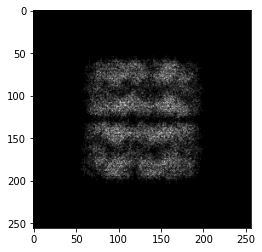

In [36]:
plt.imshow(Init_Matrix, cmap='gray')

In [41]:
noised = Init_Matrix + 0.5*random_noise(np.zeros((SIZE,SIZE)),mode='gaussian', mean=0, var=1)

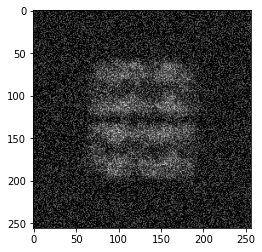

In [42]:
plt.imshow(noised, cmap='gray')

In [43]:
denoised = skimage.filters.butterworth(noised,high_pass = False,cutoff_frequency_ratio=0.1)

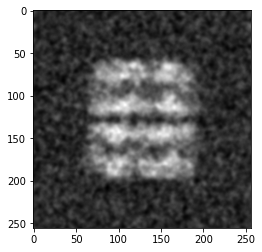

In [44]:
plt.imshow(denoised, cmap='gray')

In [53]:
print(skimage.metrics.mean_squared_error(noised,Init_Matrix))
print(skimage.metrics.mean_squared_error(denoised,Init_Matrix))

print(skimage.metrics.peak_signal_noise_ratio(noised,Init_Matrix,data_range=1))
print(skimage.metrics.peak_signal_noise_ratio(denoised,Init_Matrix,data_range=1))


print(skimage.metrics.structural_similarity(noised,Init_Matrix,data_range=1))
print(skimage.metrics.structural_similarity(denoised,Init_Matrix,data_range=1))

0.06446468436837885
0.028572024074006972
11.906781393849467
15.440589926226744
0.09192171975908335
0.08825256392118445
